In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from src.processing.constants import *
from src.processing.utils import list_files
from src.processing.txt_loading import txt_to_list
from src.processing.radial import radial_select, order_coords, create_radius_select_stack, find_period_radial_select
from src.processing.constants import BUCKLING_PATH, EDGE_TRACKING_PATH
from src.processing.autocorrelation import autocorrelate_single_value, autocorrelate_radial_ring
from src.processing.wrinkle_period import find_period_autocorrelation_fft, periods_from_image, periods_multiple_radii
from src.processing.crosscorrelation import crosscorrelation_0_to_j
from src.processing.radius_vs_intensity import plot_radius_vs_intensity

Load stack and image

In [2]:
bio_stack = imread(str(BUCKLING_PATH / '200920_biolight_nobg_nooutliers_despeckle_enhance.tif'))
bright_stack = imread(str(BUCKLING_PATH / '200920_normallight_nobg_edges_gaussblur_enhance.tif'))

In [4]:
slice_no_bio = 150
STACK_B_TO_N_RATIO = len(bio_stack) / len(bright_stack)
slice_no_bright = int(slice_no_bio / STACK_B_TO_N_RATIO)

In [5]:
img_b = bio_stack[slice_no_bio]
img_n = bright_stack[slice_no_bright]

Create centres and radii lists

In [6]:
timestamps_b, radii_b, x_center_b, y_center_b = txt_to_list(str(EDGE_TRACKING_PATH/'200920_biolight_fitted_circle_position_data.txt'))
x_center, y_center = x_center_b[slice_no_bio], y_center_b[slice_no_bio]
center_fitted = (x_center, y_center)
coffee_ring_radius = radii_b[0]

Plot radius over time

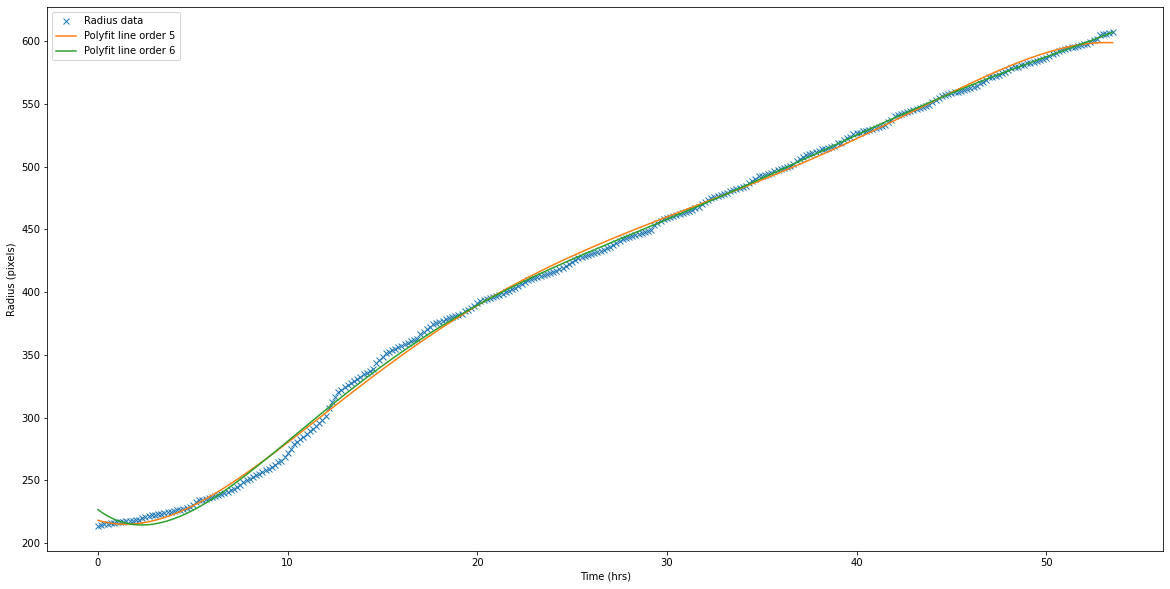

322


In [16]:
plt.figure(figsize=(20,10))

#find fit coefficients
x = np.arange(0, len(radii_b))
time = x*(1/6)
coeff1 = np.polyfit(time, radii_b, 5)
coeff2 = np.polyfit(time, radii_b, 6)
coeff3 = np.polyfit(time, radii_b, 4)
coeff4 = np.polyfit(time, radii_b, 3)

f1 = np.polyval(coeff1,time)
f2 = np.polyval(coeff2,time)
f3 = np.polyval(coeff3,time)
f4 = np.polyval(coeff4,time)

#plot data and polyfit
plt.plot(time, radii_b, 'x', label='Radius data')
#plt.plot(time, f4,'-', label='Polyfit line order 3')
#plt.plot(time, f3,'-', label='Polyfit line order 4')
plt.plot(time, f1,'-', label='Polyfit line order 5')
plt.plot(time, f2,'-', label='Polyfit line order 6')

plt.xlabel('Time (hrs)')
plt.ylabel('Radius (pixels)')
plt.legend()
plt.show()

print(len(x))

Plot intensity of image vs biofilm radius

no time intervals biolight=  322
no time intervals nromallight=  452


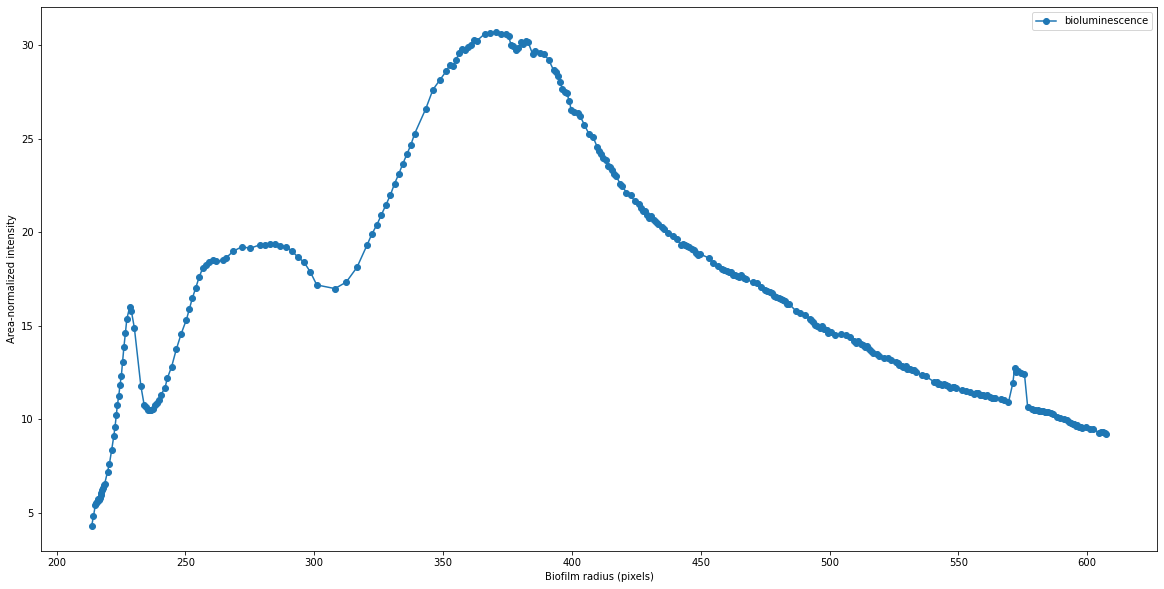

In [7]:
plot_radius_vs_intensity(bio_stack, None)

In [9]:
import skimage.filters as filters
import skimage

In [12]:
img_n_edges = filters.difference_of_gaussians(img_n, 2, 6, mode='nearest', cval=0)

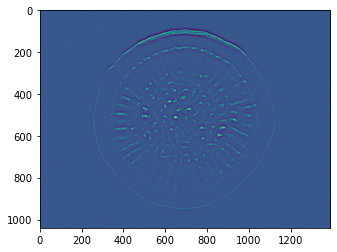

In [14]:
plt.imshow(img_n_edges)

In [ ]:
np.shape(img_b)

In [8]:
plt.figure(figsize = (15,15))
plt.plot(np.ravel(img_b)[::10], np.ravel(img_n)[::10], 'o')

In [ ]:

img1_flat = np.array(img1).flatten().tolist()

img2 = mpimg.imread('adjusted brightfield.jpg')
#img2 = filters.laplace(img2, ksize=3, mask=None)
img2 = filters.difference_of_gaussians(img2, 2, 6, mode='nearest', cval=0)

img
img2 = skimage.exposure.match_histograms(img2, img1)
# img2 = mpimg.imread('test_bright.jpg')
# img2 = img2[:,60,0]
img2_flat = img2[300]
img2_flat = np.array(img2).flatten().tolist()


#m, b = np.polyfit(img1_flat, img2_flat, 1)
#print(m,b)
#fit = m*img1 + b
#fit_flat = np.array(fit).flatten().tolist()
#print(img1)
#print(img2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(img1_flat, img2_flat, 'o', ms=1)
ax2.imshow(img1)
ax3.imshow(img2)
#plt.plot(img1_flat, fit_flat)
#plt.imshow(img2)
#plt.show()
plt.show()